In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [34]:
data_dir = 'G:\\Databases\\Python Database\\flower_photos'
os.listdir(data_dir)

['test', 'train']

In [35]:
train_set = data_dir + '\\train\\'
test_set  = data_dir + '\\test\\'

In [36]:
os.listdir(train_set + '\\daisy\\')[5]

'102841525_bd6628ae3c.jpg'

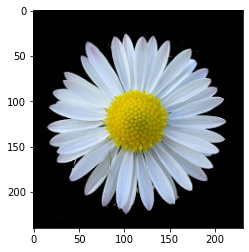

In [37]:
sample_image = train_set + '\\daisy\\'+'21652746_cc379e0eea_m.jpg'
plt.imshow(imread(sample_image))

In [38]:
image_shape = (28,28,3)
batch_size = 16

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from numpy import expand_dims

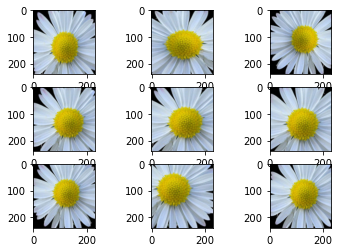

In [41]:
sample_img_gen = ImageDataGenerator(rotation_range=20,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1,
                                   shear_range=0.1,
                                   horizontal_flip=True,
                                   zoom_range=[0.5,0.7])

sample_image = load_img(sample_image)
sample_image_array = img_to_array(sample_image)
test_image = expand_dims(sample_image_array,0)
image_aug = sample_img_gen.flow(test_image,batch_size=1)

for i in range(9):
    plt.subplot(330+1+i)
    batch = image_aug.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

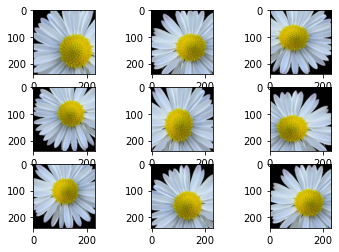

In [42]:
image_aug = sample_img_gen.flow(test_image,batch_size=1)
for i in range(9):
    plt.subplot(330+1+i)
    batch = image_aug.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [43]:
train_img_gen = ImageDataGenerator(rotation_range=20,
                                           rescale = 1./255,
                                           width_shift_range = 0.1,
                                           height_shift_range=0.1,
                                           shear_range=0.1,
                                           zoom_range=[0.5,0.7],
                                           horizontal_flip = True,
                                           fill_mode = 'nearest')
train_generated_data = train_img_gen.flow_from_directory(train_set,
                                                        target_size=image_shape[:2],
                                                        color_mode = 'rgb',
                                                        batch_size=batch_size,
                                                        class_mode = 'categorical')
print(train_generated_data.class_indices)

Found 2946 images belonging to 5 classes.
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [44]:
test_img_gen = ImageDataGenerator(rescale=1./255)

test_generated_data = test_img_gen.flow_from_directory(test_set,
                                                       target_size = image_shape[:2],
                                                       color_mode = 'rgb',
                                                      batch_size = batch_size,
                                                      class_mode  = 'categorical')
print(test_generated_data.class_indices)

Found 724 images belonging to 5 classes.
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [45]:
length_train_set = 2946
lenght_test_set = 724

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape = image_shape,activation='relu',padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu',padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='valid'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='valid'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=5,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Instance of early stopping
# early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 128)       3584      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        32832     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)         

In [48]:
model.fit_generator(train_generated_data,
                    validation_data = test_generated_data,
                    steps_per_epoch = length_train_set//batch_size,
                    validation_steps = lenght_test_set//batch_size,
                    epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 184 steps, validate for 45 steps
Epoch 1/10
184/184 [==============================] - 82s 444ms/step - loss: 1.5228 - accuracy: 0.2942 - val_loss: 1.3688 - val_accuracy: 0.3736
Epoch 2/10
184/184 [==============================] - 67s 363ms/step - loss: 1.2912 - accuracy: 0.4389 - val_loss: 1.2896 - val_accuracy: 0.4556
Epoch 3/10
184/184 [==============================] - 67s 362ms/step - loss: 1.2252 - accuracy: 0.4829 - val_loss: 1.1975 - val_accuracy: 0.5000
Epoch 4/10
184/184 [==============================] - 66s 361ms/step - loss: 1.1683 - accuracy: 0.5188 - val_loss: 1.1525 - val_accuracy: 0.5528
Epoch 5/10
184/184 [==============================] - 67s 362ms/step - loss: 1.1456 - accuracy: 0.5396 - val_loss: 1.2038 - val_accuracy: 0.4847
Epoch 6/10
184/184 [==============================] - 68s 369ms/step - loss: 1.0970 - accuracy: 0.5686 - val_loss: 1.3916 - val_accuracy: 0.4500
Epoch 7/10
184/184 [=================

<AxesSubplot:>

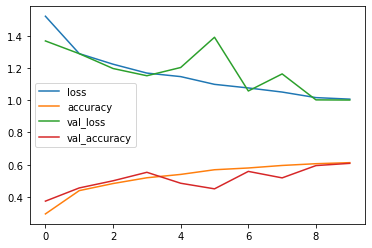

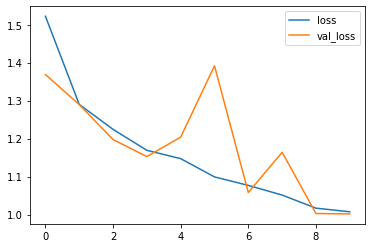

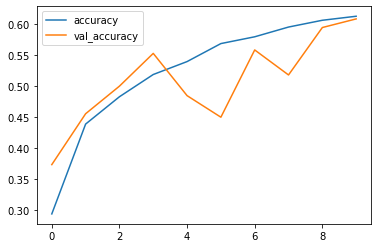

In [49]:
results = pd.DataFrame(model.history.history)
results.plot()
results[['loss','val_loss']].plot()
results[['accuracy','val_accuracy']].plot()

In [50]:
print('Loss: ',model.evaluate_generator(test_generated_data)[0],
      'Accuracy: ',model.evaluate_generator(test_generated_data)[1])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Loss:  1.0264176998449408 Accuracy:  0.6077348


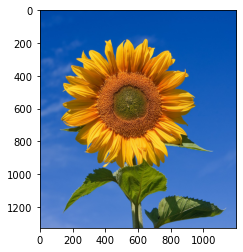

In [51]:
test_img = 'test.jpg'
plt.imshow(imread(test_img))

In [52]:
from tensorflow.keras.preprocessing import image


new_img = image.load_img(test_img,target_size=image_shape) #loading image as a tensor for the model
new_img   # Checking the image after converting it to tensor
new_img_array = image.img_to_array(new_img)  # converting the tensor to an array form on which the model predict on

new_img_array.shape  #(28,28,3)
new_img_array = np.expand_dims(new_img_array,axis=0) 

In [53]:
probabilities = model.predict(new_img_array)  #predicting the probabilites of the classes

print(list(train_generated_data.class_indices)[0],":",probabilities[0][0]*100,'%\n',
      list(train_generated_data.class_indices)[1],":",probabilities[0][1]*100,'%\n',
      list(train_generated_data.class_indices)[2],":",probabilities[0][2]*100,'%\n',
      list(train_generated_data.class_indices)[3],":",probabilities[0][3]*100,'%\n',
      list(train_generated_data.class_indices)[4],":",probabilities[0][4]*100,'%')

daisy : 0.0 %
 dandelion : 0.0 %
 roses : 0.0 %
 sunflowers : 100.0 %
 tulips : 0.0 %


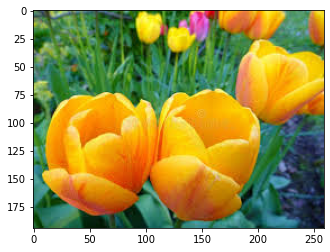

In [54]:
test_img = 'test_1.jpg'
plt.imshow(imread(test_img))


In [55]:
from tensorflow.keras.preprocessing import image
new_img = image.load_img(test_img,target_size=image_shape) #loading image as a tensor for the model
new_img   # Checking the image after converting it to tensor
new_img_array = image.img_to_array(new_img)  # converting the tensor to an array form on which the model predict on

new_img_array.shape  #(28,28,3)
new_img_array = np.expand_dims(new_img_array,axis=0) 

probabilities = model.predict(new_img_array)  #predicting the probabilites of the classes

print(list(train_generated_data.class_indices)[0],":",probabilities[0][0]*100,'%\n',
      list(train_generated_data.class_indices)[1],":",probabilities[0][1]*100,'%\n',
      list(train_generated_data.class_indices)[2],":",probabilities[0][2]*100,'%\n',
      list(train_generated_data.class_indices)[3],":",probabilities[0][3]*100,'%\n',
      list(train_generated_data.class_indices)[4],":",probabilities[0][4]*100,'%')

daisy : 0.0 %
 dandelion : 0.0 %
 roses : 0.0 %
 sunflowers : 6.1470007686401096e-12 %
 tulips : 100.0 %


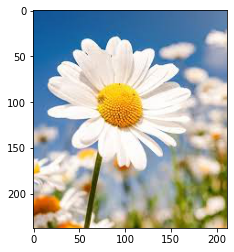

In [58]:
test_img = 'test_2.jpg'
plt.imshow(imread(test_img))


In [59]:
from tensorflow.keras.preprocessing import image
new_img = image.load_img(test_img,target_size=image_shape) #loading image as a tensor for the model
new_img   # Checking the image after converting it to tensor
new_img_array = image.img_to_array(new_img)  # converting the tensor to an array form on which the model predict on

new_img_array.shape  #(28,28,3)
new_img_array = np.expand_dims(new_img_array,axis=0) 

probabilities = model.predict(new_img_array)  #predicting the probabilites of the classes

print(list(train_generated_data.class_indices)[0],":",probabilities[0][0]*100,'%\n',
      list(train_generated_data.class_indices)[1],":",probabilities[0][1]*100,'%\n',
      list(train_generated_data.class_indices)[2],":",probabilities[0][2]*100,'%\n',
      list(train_generated_data.class_indices)[3],":",probabilities[0][3]*100,'%\n',
      list(train_generated_data.class_indices)[4],":",probabilities[0][4]*100,'%')

daisy : 100.0 %
 dandelion : 0.0 %
 roses : 0.0 %
 sunflowers : 0.0 %
 tulips : 0.0 %


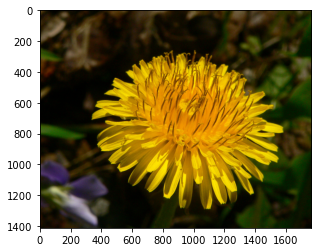

In [62]:
test_img = 'test_3.jpg'
plt.imshow(imread(test_img))

In [63]:
from tensorflow.keras.preprocessing import image
new_img = image.load_img(test_img,target_size=image_shape) #loading image as a tensor for the model
new_img   # Checking the image after converting it to tensor
new_img_array = image.img_to_array(new_img)  # converting the tensor to an array form on which the model predict on

new_img_array.shape  #(28,28,3)
new_img_array = np.expand_dims(new_img_array,axis=0) 

probabilities = model.predict(new_img_array)  #predicting the probabilites of the classes

print(list(train_generated_data.class_indices)[0],":",probabilities[0][0]*100,'%\n',
      list(train_generated_data.class_indices)[1],":",probabilities[0][1]*100,'%\n',
      list(train_generated_data.class_indices)[2],":",probabilities[0][2]*100,'%\n',
      list(train_generated_data.class_indices)[3],":",probabilities[0][3]*100,'%\n',
      list(train_generated_data.class_indices)[4],":",probabilities[0][4]*100,'%')

daisy : 0.0 %
 dandelion : 100.0 %
 roses : 0.0 %
 sunflowers : 0.0 %
 tulips : 0.0 %
